Bayesian Statistics Made Simple
===

Code and exercises from my workshop on Bayesian statistics in Python.

Copyright 2016 Allen Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

import matplotlib.pyplot as plt

from empiricaldist import Pmf

### The Euro problem

*"When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110.  'It looks very suspicious to me,' said Barry Blight, a statistics lecturer at the London School of Economics.  'If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.' "*

From “The Guardian” quoted by MacKay, *Information Theory, Inference, and Learning Algorithms*.


**Exercise 1:**  Write a function called `likelihood_euro` that defines the likelihood function for the Euro problem.  Note that `hypo` is in the range 0 to 100.

Here's an outline to get you started.

In [6]:
def likelihood_euro(data, hypo):
    """ Likelihood function for the Euro problem.
    
    data: string, either 'H' or 'T'
    hypo: prob of heads (0-100)
    
    returns: float probability
    """
    # TODO: fill this in!
    return 1

In [2]:
# Solution goes here
def likelihood_euro(data, hypo):
    """ Likelihood function for the Euro problem.
    
    data: string, either 'H' or 'T'
    hypo: prob of heads (0-100)
    
    returns: float probability
    """
    if data == 'H':
        return hypo/100
    else:
        return 1 - hypo/100

For the prior, we'll start with a uniform distribution from 0 to 100.

In [3]:
def decorate_euro(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Probability of heads')
    plt.ylabel('PMF')
    plt.title(title)

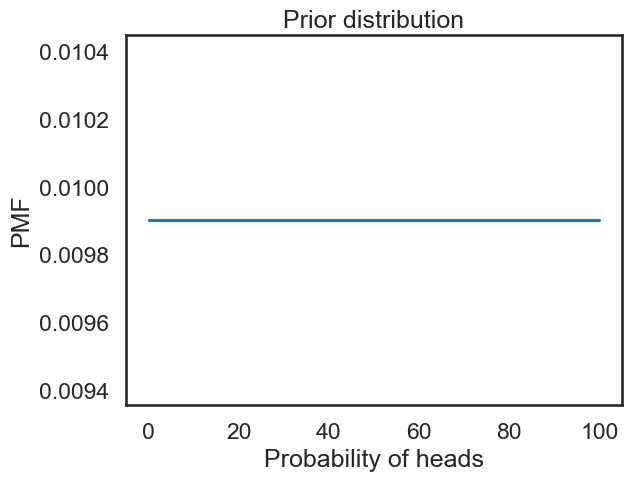

In [4]:
euro = Pmf.from_seq(range(101))
euro.plot()
decorate_euro('Prior distribution')

Now we can update with a single heads:

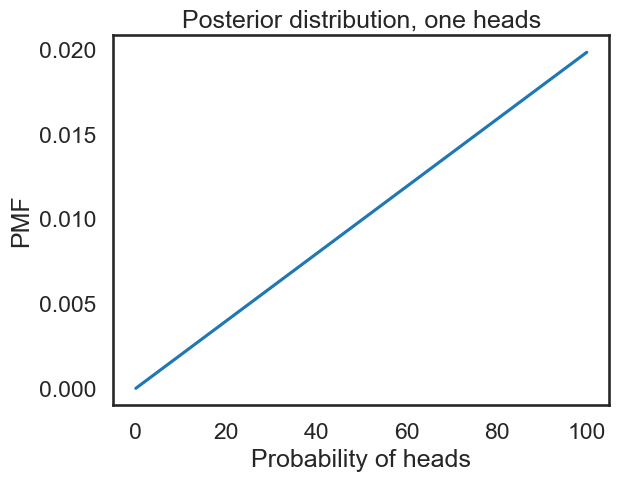

In [6]:
euro.update(likelihood_euro, 'H')
euro.plot()
decorate_euro('Posterior distribution, one heads')

Another heads:

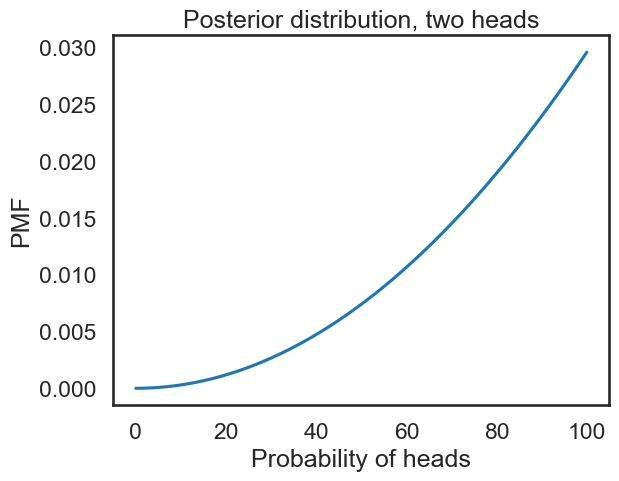

In [7]:
euro.update(likelihood_euro, 'H')
euro.plot()
decorate_euro('Posterior distribution, two heads')

And a tails:

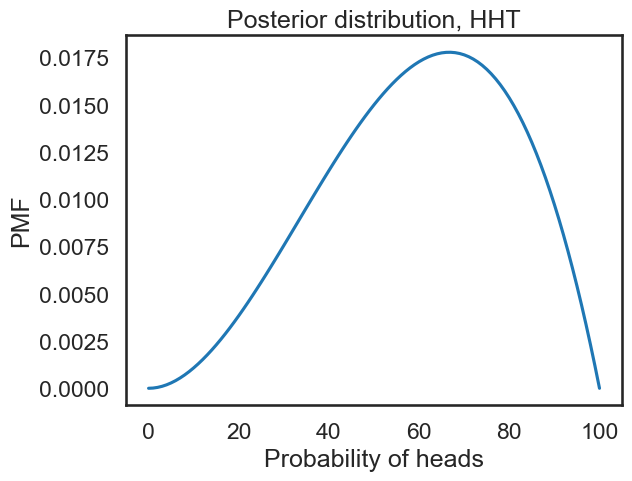

In [8]:
euro.update(likelihood_euro, 'T')
euro.plot()
decorate_euro('Posterior distribution, HHT')

Starting over, here's what it looks like after 7 heads and 3 tails.

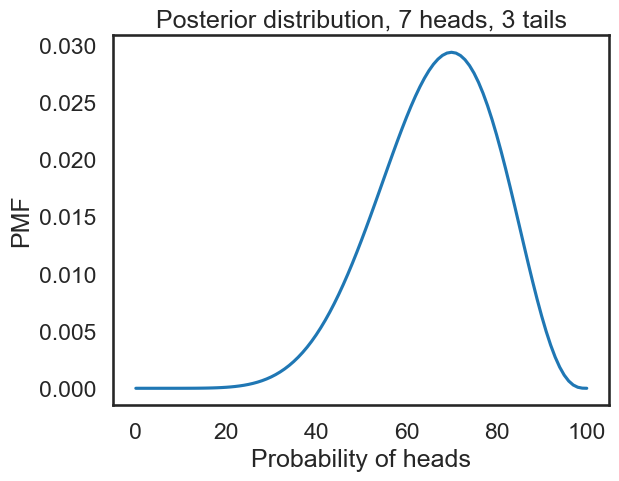

In [9]:
euro = Pmf.from_seq(range(101))

for outcome in 'HHHHHHHTTT':
    euro.update(likelihood_euro, outcome)

euro.plot()
decorate_euro('Posterior distribution, 7 heads, 3 tails')

The maximum apostiori probability (MAP) is 70%, which is the observed proportion.

In [10]:
euro.max_prob()

70

Here are the posterior probabilities after 140 heads and 110 tails.

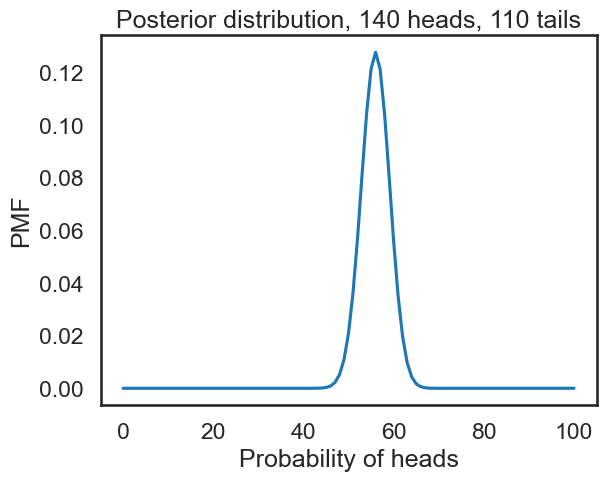

In [11]:
euro = Pmf.from_seq(range(101))

evidence = 'H' * 140 + 'T' * 110
for outcome in evidence:
    euro.update(likelihood_euro, outcome)
    
euro.plot()

decorate_euro('Posterior distribution, 140 heads, 110 tails')

The posterior mean is about 56%

In [12]:
euro.mean()

55.95238095238095

So is the MAP.

In [13]:
euro.max_prob()

56

And the median (50th percentile).

In [14]:
euro.quantile(0.5)

array(56.)

The posterior credible interval has a 90% chance of containing the true value (provided that the prior distribution truly represents our background knowledge).

In [15]:
euro.credible_interval(0.9)

array([51., 61.])

### Swamping the prior

The following function makes a Euro object with a triangle prior.

In [16]:
def TrianglePrior():
    """Makes a Suite with a triangular prior.
    """
    suite = Pmf(name='triangle')
    for x in range(0, 51):
        suite[x] = x
    for x in range(51, 101):
        suite[x] = 100-x 
    suite.normalize()
    return suite

And here's what it looks like:

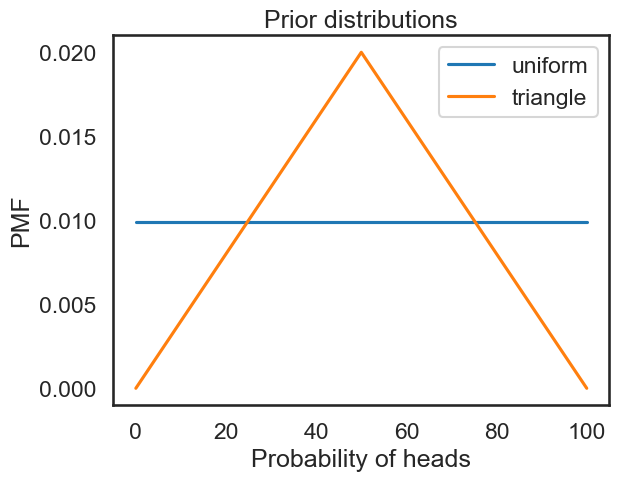

In [17]:
euro1 = Pmf.from_seq(range(101), name='uniform')
euro1.plot()

euro2 = TrianglePrior()
euro2.plot()

plt.legend()
decorate_euro('Prior distributions')

**Exercise 9:** Update `euro1` and `euro2` with the same data we used before (140 heads and 110 tails) and plot the posteriors.  How big is the difference in the means?

(55.988023952095816, 55.93220827904443)

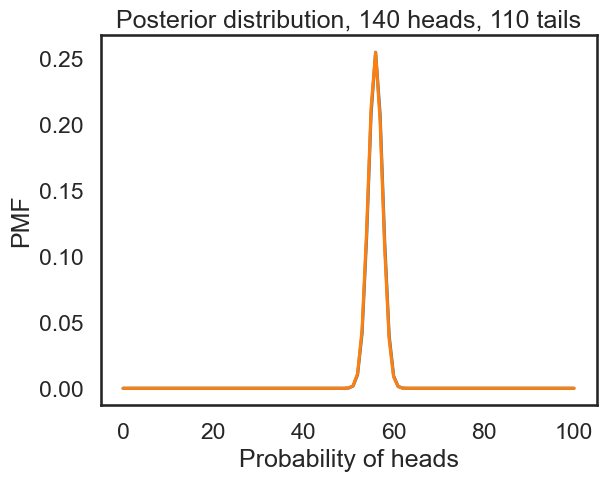

In [21]:
# Solution goes here

evidence = 'H' * 140 + 'T' * 110
for outcome in evidence:
    euro1.update(likelihood_euro, outcome)
    euro2.update(likelihood_euro, outcome)

euro1.plot()
euro2.plot()

decorate_euro('Posterior distribution, 140 heads, 110 tails')

euro1.mean(), euro2.mean()

The posterior distributions are not identical, but with this data, they converge to the point where there is no practical difference, for most purposes.